In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy import stats

# Generate critical values (TO-DO: Fix). Looked up .05 is 1.656 though)

In [231]:
# sample_length = 10000

# bb_sq = []

# for _ in range(0,1000):
#     brownian = np.cumsum( np.random.normal(0,1,sample_size))/np.sqrt(sample_length)

#     bb_sq.append(  1/(1.0e-04) *np.square(brownian - np.linspace(0,1,sample_size)*brownian[-1]).mean())

In [232]:
# pd.DataFrame(bb_sq).hist()
# pd.DataFrame(bb_sq).quantile([.75,.9,.95])

# Generate some tests

## Normal data with density correct

In [244]:
sample_size = 30

pit_pvals = []
sq_test_stats = []
cts = []

for _ in range(0,1000):
    sample = np.random.normal(0,1,sample_size)

    #ks p-value
    pit_pvals.append(stats.kstest(norm.cdf(sample), 'uniform')[1])

    alpha_list = np.linspace(.05,.95, 20)
#     alpha_list = [.5]
    alpha_step = alpha_list[1] - alpha_list[0]

    #Square prediction interval test
    pred_test = 0
    for alpha in alpha_list:
        ci =  scipy.stats.norm.interval(alpha, loc=0, scale=1)
        ct_alpha = ((1*(sample > ci[0])*(sample<ci[1])).sum() - sample_size*alpha)/np.sqrt(sample_size*alpha*(1-alpha))
        pred_test = pred_test + np.square(ct_alpha)*(alpha_step)
        cts.append(ct_alpha)

    sq_test_stats.append(pred_test )

0    0.887
dtype: float64

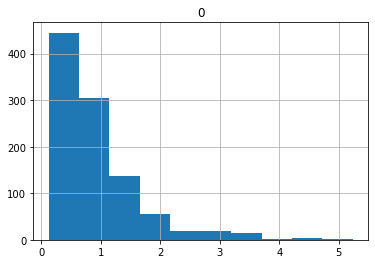

In [245]:
pd.DataFrame(sq_test_stats).hist()
(pd.DataFrame(sq_test_stats) < 1.656).mean()

0    0.909
dtype: float64

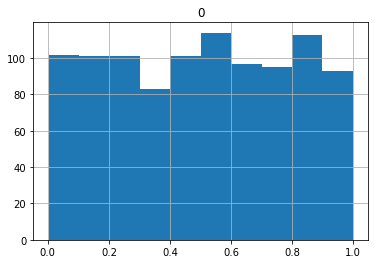

In [246]:
pd.DataFrame(pit_pvals).hist()
1*(pd.DataFrame(pit_pvals) < .9).mean()

# Data is now U[-sqrt(3),sqrt(3)] while density is beleived to be N(0,1)

In [247]:
sample_size = 30
sqrt_3 = np.sqrt(3)

pit_pvals = []
sq_test_stats = []
cts = []

for _ in range(0,1000):
    sample = np.random.uniform(-sqrt_3,sqrt_3,sample_size)

    #ks p-value
    pit_pvals.append(stats.kstest(norm.cdf(sample), 'uniform')[1])

    alpha_list = np.linspace(.05,.95, 20)
#     alpha_list = [.5]
    alpha_step = alpha_list[1] - alpha_list[0]

    #Square prediction interval test
    pred_test = 0
    for alpha in alpha_list:
        ci =  scipy.stats.norm.interval(alpha, loc=0, scale=1)
        ct_alpha = ((1*(sample > ci[0])*(sample<ci[1])).sum() - sample_size*alpha)/np.sqrt(sample_size*alpha*(1-alpha))
        pred_test = pred_test + np.square(ct_alpha)*(alpha_step)
        cts.append(ct_alpha)

    sq_test_stats.append(pred_test )

0    0.625
dtype: float64

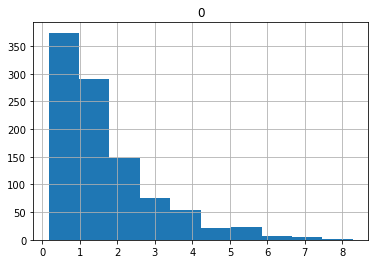

In [248]:
pd.DataFrame(sq_test_stats).hist()
(pd.DataFrame(sq_test_stats) < 1.656).mean()

0    0.943
dtype: float64

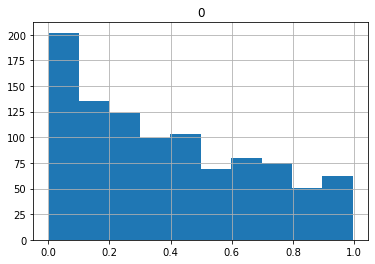

In [249]:
pd.DataFrame(pit_pvals).hist()
1*(pd.DataFrame(pit_pvals) < .9).mean()